In [8]:
import os
import cv2
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE

In [9]:
def read_images(folder, target_size=(100, 100)):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename), cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, target_size)  # Redimensionar imagen
            img = img.astype(np.float32) / 255.0  # Normalizar imagen
            images.append(img)
    return images

In [10]:
def flatten_images(images):
    flattened_images = np.array([img.flatten() for img in images])
    return flattened_images

In [11]:
def perform_pca(images, num_components):
    pca = PCA(n_components=num_components)
    pca.fit(images)
    return pca

In [12]:
def print_component_matrices(pca):
    print("Matriz de cada componente:")
    for i, component in enumerate(pca.components_):
        print(f"Componente {i+1}:")
        print(component)
        print()

In [13]:
def print_pca_analysis(pca):
    print("Componentes Principales:")
    print(pca.components_)
    print("\nValores Propios (Varianza Explicada):")
    print(pca.explained_variance_)
    print("\nVarianza Explicada:")
    print(pca.explained_variance_ratio_)
    print("\nVectores de Carga:")
    print(pca.components_.T * np.sqrt(pca.explained_variance_))

In [14]:
if __name__ == "__main__":
    # Set the folder containing images
    folder = 'images'

    images = read_images(folder)

    flattened_images = flatten_images(images)

    # Perform PCA
    num_components = min(len(flattened_images), len(flattened_images[0]))  # Use all possible components
    pca = perform_pca(flattened_images, num_components)

    # Print component matrices
    print_component_matrices(pca)

    # Print all relevant values for PCA analysis
    print_pca_analysis(pca)

Matriz de cada componente:
Componente 1:
[-0.00191897 -0.00234732 -0.00253127 ... -0.00630232 -0.00574706
 -0.00381812]

Componente 2:
[-0.0116541  -0.01265435 -0.01193094 ... -0.02393379 -0.02448849
 -0.02193291]

Componente 3:
[0.01259779 0.01206567 0.01098088 ... 0.00209645 0.01073052 0.02432948]

Componente 4:
[-0.00140711 -0.00210021 -0.00485581 ... -0.01303651 -0.00714956
 -0.00458124]

Componente 5:
[ 0.01039967  0.00635889  0.00527116 ... -0.01752056 -0.0084161
  0.02055905]

Componente 6:
[ 0.01137895  0.00882459  0.01219512 ...  0.00099267 -0.01222774
  0.01798895]

Componente 7:
[-0.00577101 -0.01463483 -0.01441503 ... -0.02414554 -0.03150228
 -0.00554644]

Componente 8:
[-0.00013848  0.00347606  0.00105773 ...  0.0047703   0.01394534
  0.00167576]

Componente 9:
[-0.00143643  0.00111717 -0.00151706 ... -0.0189224  -0.00445987
  0.00593092]

Componente 10:
[-4.2584301e-03 -6.2056119e-03 -2.6485617e-03 ...  1.0923614e-03
 -1.7816233e-02 -2.0551495e-05]

Componente 11:
[0.0293

In [15]:
def plot_explained_variance(pca):
    explained_variance_ratio = pca.explained_variance_ratio_
    cum_explained_variance_ratio = np.cumsum(explained_variance_ratio)

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(explained_variance_ratio) + 1), cum_explained_variance_ratio, marker='o', linestyle='-')
    plt.xlabel('Número de Componentes Principales')
    plt.ylabel('Varianza Explicada Acumulada')
    plt.title('Varianza Explicada por Componentes Principales')
    plt.grid()
    plt.show()

In [16]:
def plot_image_reconstruction(pca, images, num_components_to_keep=50):
    reconstructed_images = pca.inverse_transform(pca.transform(flatten_images(images)))
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i, ax in enumerate(axes.flat):
        ax.imshow(reconstructed_images[i].reshape(images[0].shape), cmap='gray')
        ax.axis('off')
        ax.set_title(f'Num Componentes: {num_components_to_keep}')
    plt.show()

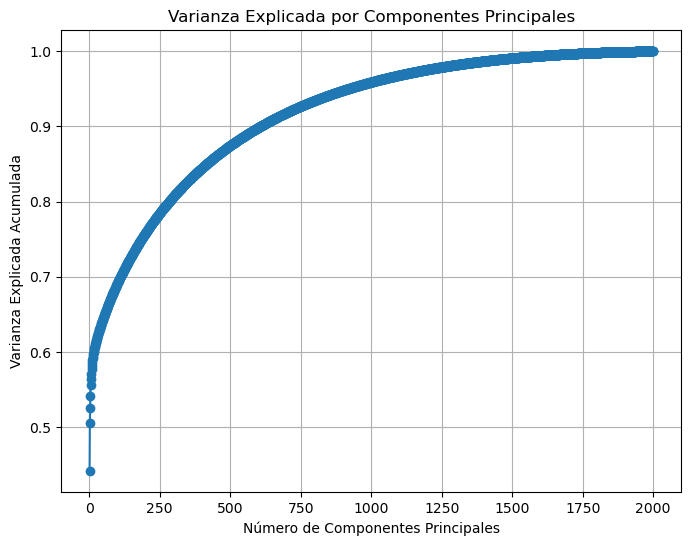

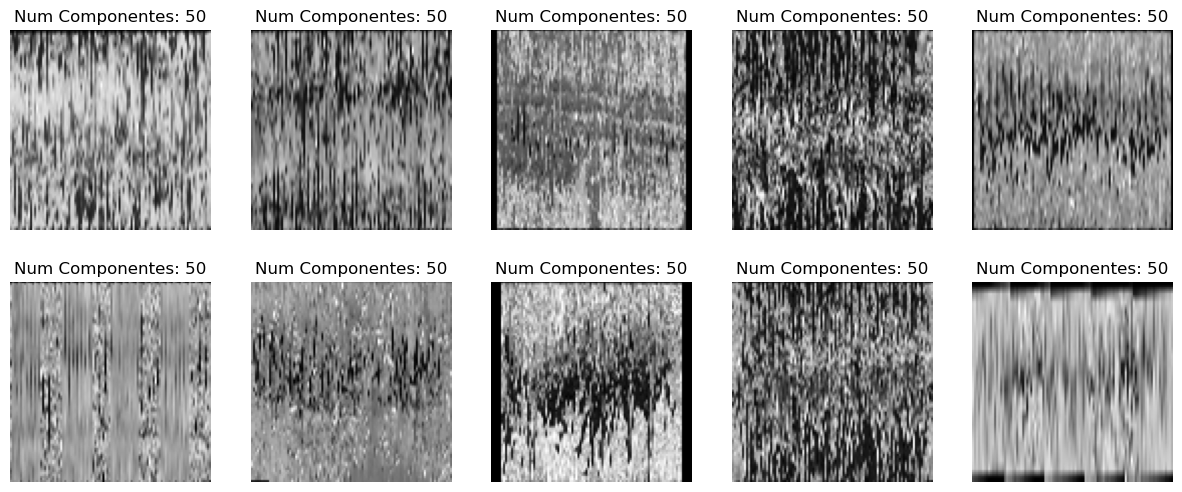

In [17]:
if __name__ == "__main__":
    folder = 'images'

    images = read_images(folder)

    flattened_images = flatten_images(images)

    num_components = min(len(flattened_images), len(flattened_images[0]))  
    pca = perform_pca(flattened_images, num_components)

    plot_explained_variance(pca)

    plot_image_reconstruction(pca, images)